### Imports

In [104]:
import pandas as pd
import numpy as np

from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import yfinance as yf
yf.pdr_override()

import matplotlib.pyplot as plt

In [105]:
# Load the data
df=pd.read_csv('data/btc_with_features.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')


In [106]:
# Select the features
features = df[['Volume','range','DXY','lrets','lrets_T1','lrets_T2','lrets_T3','lrets_T4','lrets_T5','lrets_T6','lrets_T7']].values


### Optimize Parameters

In [107]:
param_grid = {
    'n_components': [4,5,6],  # Number of hidden states
    'covariance_type': ['diag', 'full'],  # Type of covariance matrix
    'n_iter': [1,5,10, 15]  # Number of EM iterations
}

# Initialize GaussianHMM
hmm = GaussianHMM()

# Initialize GridSearchCV
grid_search = GridSearchCV(hmm, param_grid, cv=5, n_jobs=-1,scoring='accuracy')

# Fit the grid search to find the best parameters
grid_search.fit(features)

# Get the best parameters
best_params = grid_search.best_params_

c:\Users\Kreator\anaconda3\envs\MLTRADE\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
39 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kreator\anaconda3\envs\MLTRADE\lib\site-packages\hmmlearn\stats.py", line 82, in _log_multivariate_normal_density_full
    cv_chol = linalg.cholesky(cv, lower=True)
  File "c:\Users\Kreator\anaconda3\envs\MLTRADE\lib\site-packages\scipy\linalg\_decomp_cholesky.py", line 89, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
  File "c:\Users\Kreator\anaconda3\envs\MLTRADE\lib\site-packages\scipy\linalg\_de

### Train HMM

In [108]:

print(f'grid search: {best_params}')

grid search: {'covariance_type': 'diag', 'n_components': 4, 'n_iter': 1}


In [109]:
hidden_states = 4

In [110]:
# Train the final model with the best parameters
model = GaussianHMM(n_components=hidden_states,covariance_type='diag',n_iter=1000)
model.fit(features)
print(model.score(features))

88762.53975256649


In [111]:
# Check results
hidden_states_predicted = model.predict(features)
hidden_states_predicted

array([3, 3, 1, ..., 2, 2, 0], dtype=int64)

### Plotting

In [125]:
# Plotting Preparation
i=0
labels_0 =[]
labels_1 =[]
labels_2 =[]
labels_3 =[]
labels_4 =[]

prices=df['Close'].values.astype(float)
print(len(prices)==len(hidden_states_predicted))

for state in hidden_states_predicted:
  if state == 0:
    labels_0.append(prices[i])
    labels_1.append(float('nan'))
    labels_2.append(float('nan'))
    labels_3.append(float('nan'))
    labels_4.append(float('nan'))

  if state == 1:
    labels_0.append(float('nan'))
    labels_1.append(prices[i])
    labels_2.append(float('nan'))
    labels_3.append(float('nan'))
    labels_4.append(float('nan'))

  if state == 2:
    labels_0.append(float('nan'))
    labels_1.append(float('nan'))
    labels_2.append(prices[i])
    labels_3.append(float('nan'))
    labels_4.append(float('nan'))

  if state == 3:
    labels_0.append(float('nan'))
    labels_1.append(float('nan'))
    labels_2.append(float('nan'))
    labels_3.append(prices[i])
    labels_4.append(float('nan'))

  if state == 4:
    labels_0.append(float('nan'))
    labels_1.append(float('nan'))
    labels_2.append(float('nan'))
    labels_3.append(float('nan'))
    labels_4.append(prices[i])

  i+=1


print(len(labels_0))

True
3429


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


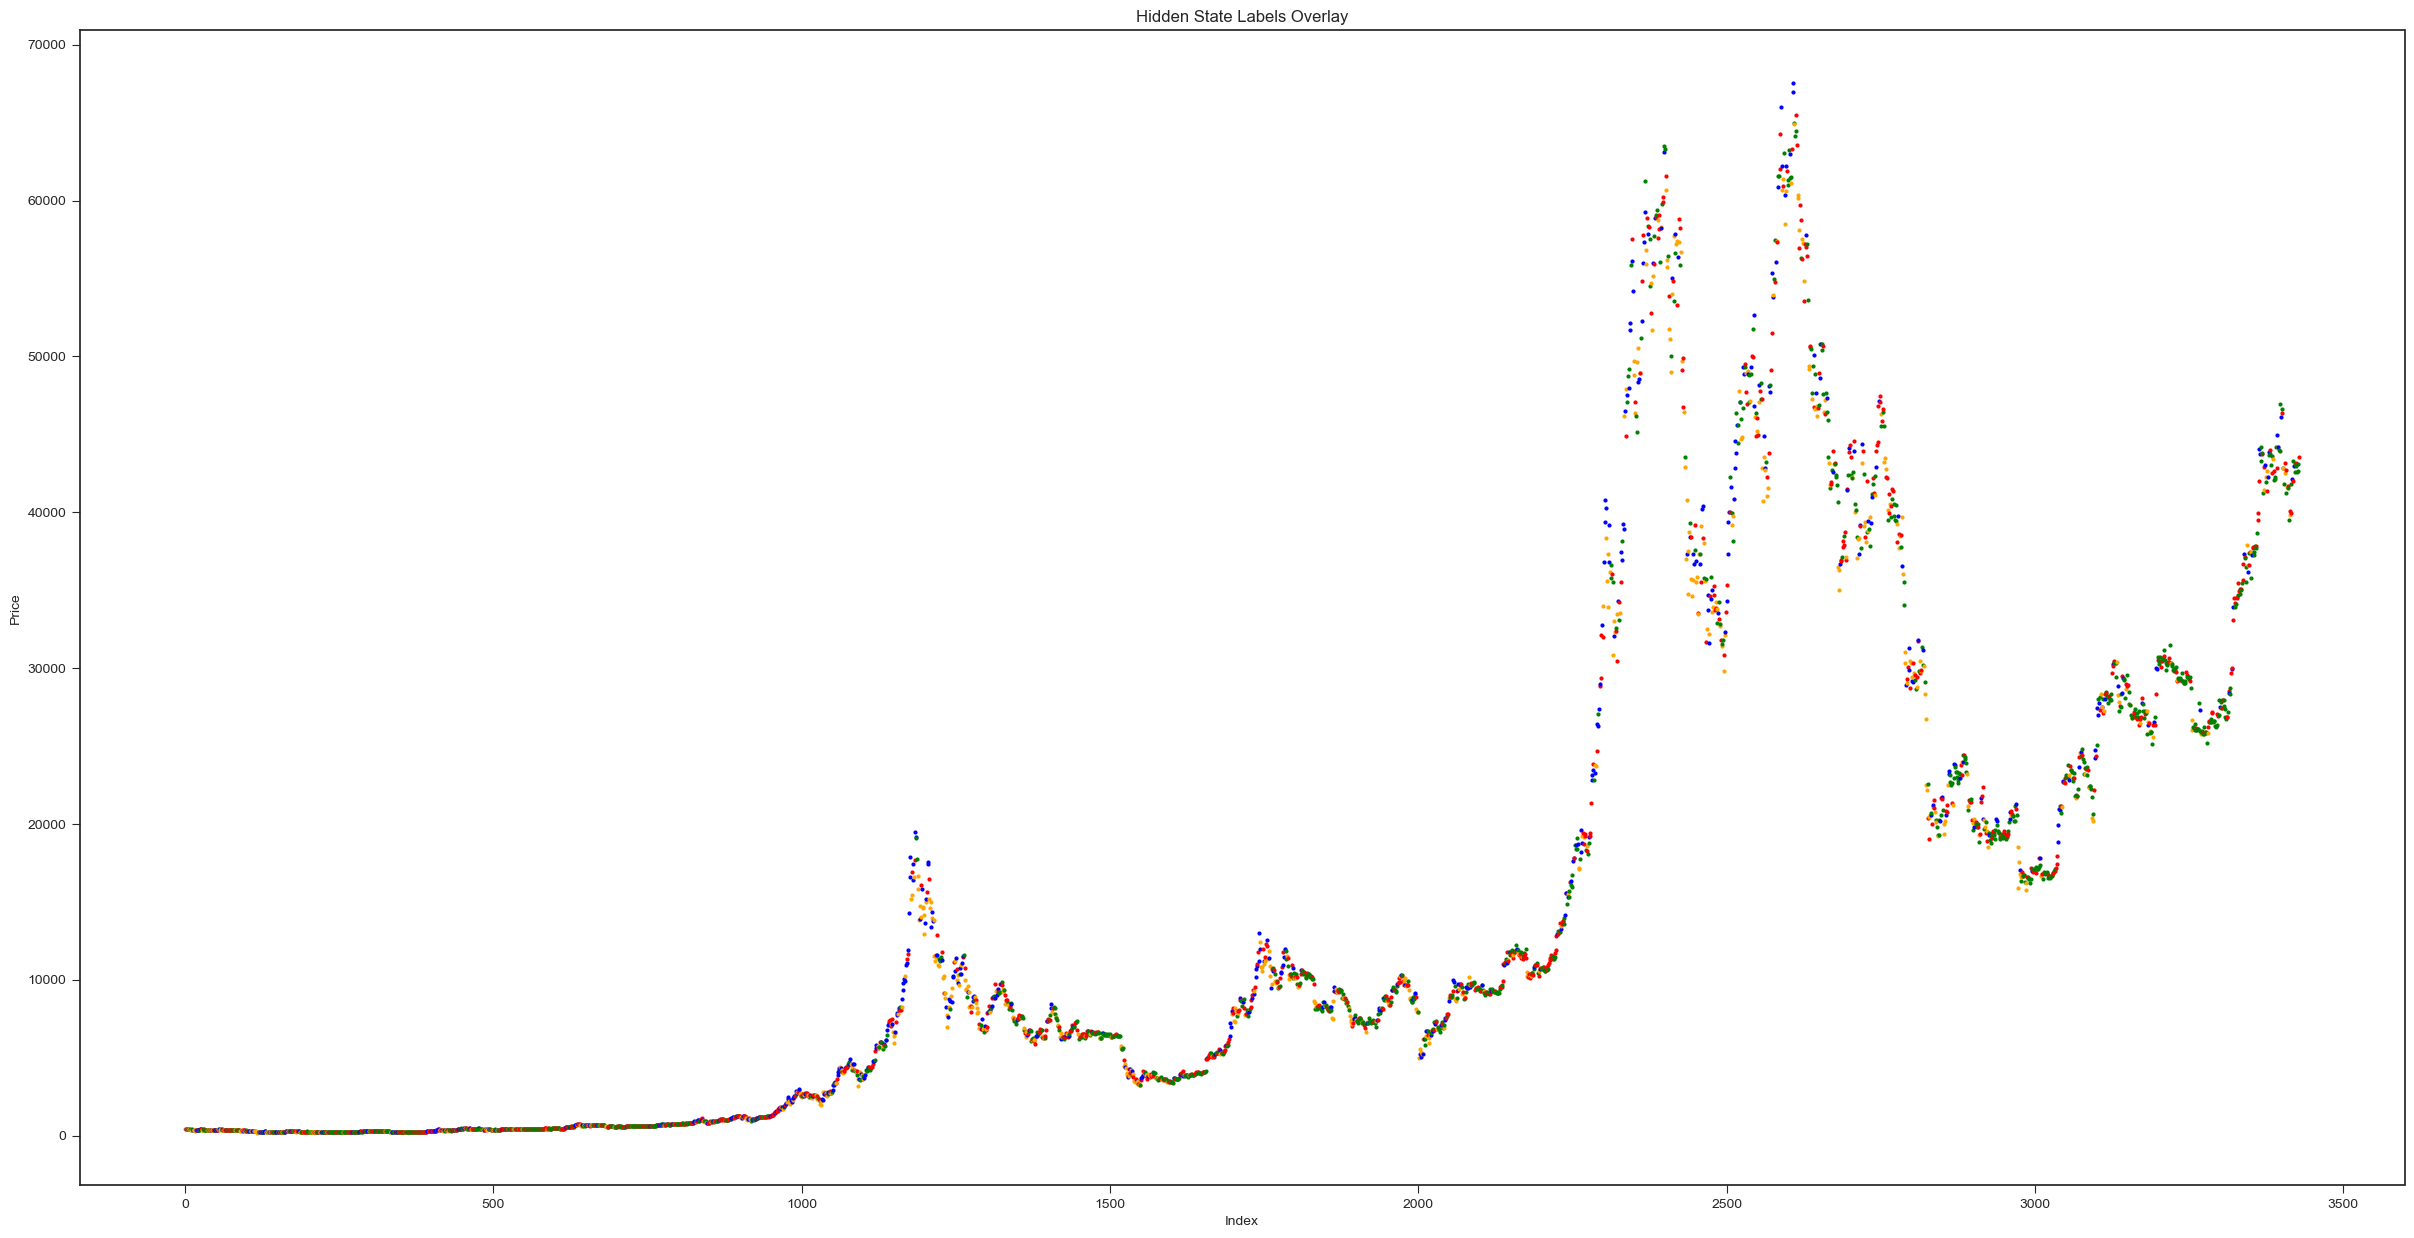

In [121]:

plt.figure(figsize=(30, 15))
# plt.plot(prices, label='Prices', color='black',alpha=0.5)

# Overlay the labels for each hidden state
for i, state in enumerate(hidden_states_predicted):
    if state == 0:
        plt.scatter(i, labels_0[i], color='red', marker='o',s=4)
    elif state == 1:
        plt.scatter(i, labels_1[i], color='blue', marker='o',s=4)
    elif state == 2:
        plt.scatter(i, labels_2[i], color='green', marker='o',s=4)
    elif state == 3:
        plt.scatter(i, labels_3[i], color='orange', marker='o',s=4)


plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Hidden State Labels Overlay')
plt.legend()
plt.show()

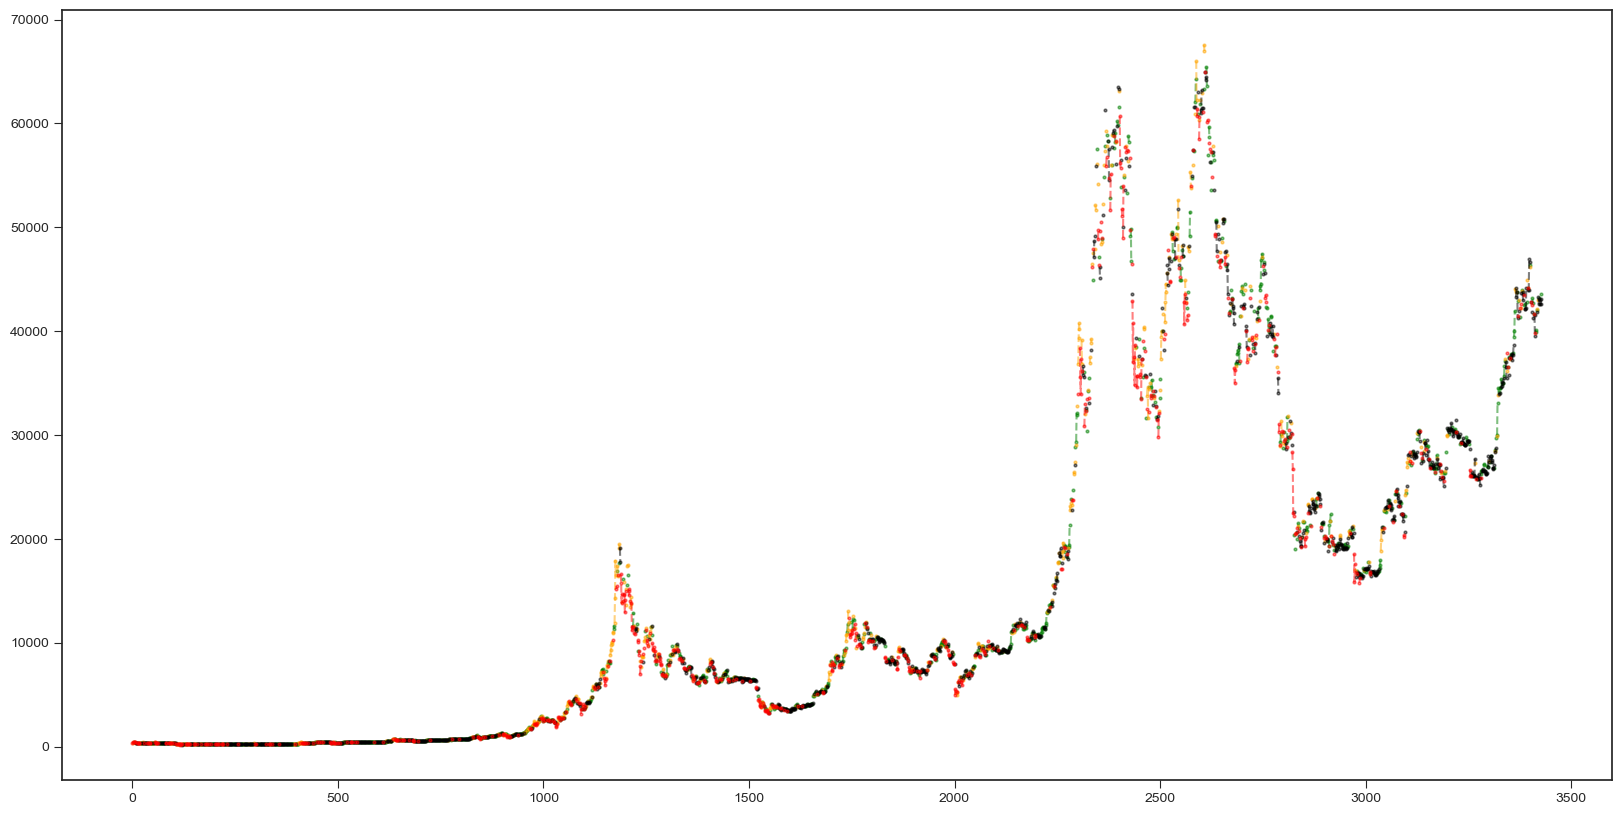

In [143]:
fig = plt.figure(figsize=(20,10))
plt.plot(labels_0,color='green',alpha=0.5, linestyle='dashed', marker='o',markersize=2)
plt.plot(labels_1,color='orange',alpha=0.5, linestyle='dashed', marker='o',markersize=2)
plt.plot(labels_2,color='black',alpha=0.5, linestyle='dashed', marker='o',markersize=2)
plt.plot(labels_3,color='red',alpha=0.5, linestyle='dashed', marker='o',markersize=2)
